<a href="https://colab.research.google.com/github/diegosalinas04/Actividad-5/blob/main/Regresio_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [6]:
pd.options.display.max_columns = None

In [98]:
pd.options.display.max_rows = None


In [107]:
data = pd.read_csv("cuentas_credicel.csv", encoding= 'latin')
data.head(5)

<ipython-input-107-687fd0966884>:1: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cuentas_credicel.csv", encoding= 'latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaN,NaN,NaN,NaN,Cancelado,0.0,0.0,0.0,0,0.0,NaN,NaN,74,NaN,NaN
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,05/03/2022 00:00,12/03/2022 00:00,Mora,0.0,0,0.0,0.0,0.0,NaN,NaN,74,NaN,NaN,NaN,NaN


In [135]:
tab = data.iloc[:, [8,7,12, 20, 26,6,11,27]]
tab.head(2)

,enganche,precio,costo_total,pagos_realizados,riesgo,plazo,monto_financiado,porc_enganche
0,780.0,1949.0,2106,0,NaN,26,1169.0,NaN
1,1050.0,2999.0,2925,0,NaN,13,1949.0,NaN


In [139]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enganche          22735 non-null  float64
 1   precio            22735 non-null  float64
 2   costo_total       22735 non-null  int64  
 3   pagos_realizados  22735 non-null  int64  
 4   riesgo            20262 non-null  object 
 5   plazo             22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   porc_enganche     20262 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ MB


In [140]:
#Corrobamos valores nulos
valores_nulos = tab.isnull().sum()
valores_nulos

enganche               0
precio                 0
costo_total            0
pagos_realizados       0
riesgo              2473
plazo                  0
monto_financiado       0
porc_enganche       2473
dtype: int64

In [142]:
data["plazo"]= data["plazo"].astype(int)

In [143]:
#Verificamos que se haya convertido
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enganche          22735 non-null  float64
 1   precio            22735 non-null  float64
 2   costo_total       22735 non-null  int64  
 3   pagos_realizados  22735 non-null  int64  
 4   riesgo            20262 non-null  object 
 5   plazo             22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   porc_enganche     20262 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ MB


Convertimos riesgos a enteros

In [21]:
tab["riesgo"]= tab["riesgo"].fillna(0)

In [ ]:
riesgo_categorias = tab.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

In [23]:
tab['riesgo']=tab['riesgo'].str.replace('Fraude', '0')
tab['riesgo']=tab['riesgo'].str.replace('Atraso', '0')
tab['riesgo']=tab['riesgo'].str.replace('Cancelado', '0')

In [26]:
tab["riesgo"]= tab["riesgo"].astype(float)

In [ ]:
tab.info()

<Figure size 1500x800 with 0 Axes>

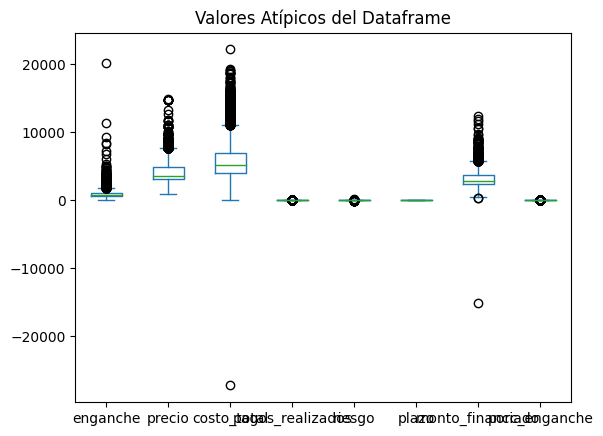

In [27]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
tab.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#hacemos desviacion estandar
y=tab
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [29]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
tab_sin_outliers = tab[(y<=Limite_Superior)&(y>=Limite_Inferior)]

In [ ]:
#Corroboramos valores nulos
valores_nulos=tab_sin_outliers.isnull().sum()
valores_nulos

In [31]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cl = tab_sin_outliers.copy()
data_cl=data_cl.fillna(round(tab_sin_outliers.mean(),1))

In [ ]:
valores_nulos=data_cl.isnull().sum()
valores_nulos

Primera variable "enganche"



In [145]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['enganche']

In [146]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [147]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [148]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07715784]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 466.36566839862877}

y=0.07715784x + 466.36566839862877

In [149]:
#Se sustituyen los valores predecidos en los valores reales
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([ 628.86008196,  692.0523539 ,  636.88449745, ...,  979.92825941,
        897.56997972, 1066.19072587])

In [150]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.2009194399413815

In [151]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4482403818726973

Segunda variable "Precio"

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['precio']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.50428665]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 1150.9382599491637}

y=0.50428665x+1150.9382599491637

In [45]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([2212.9659513 , 2625.97672016, 2265.41176322, ..., 4507.47022274,
       3969.19464926, 5071.26270087])

In [46]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.7024382841015145

In [47]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.838115913284979

Tercera variable "Costo total"

In [154]:
Vars_Indep= data_cl[['pagos_realizados']]
Var_Dep= data_cl['costo_total']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([28.09011946]),
 'rank_': 1,
 'singular_': array([1395.11355121]),
 'intercept_': 5310.053345591474}

y=28.09011946x+5310.053345591474

In [155]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.014578747219465171

In [156]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1207424830764432

Cuarta variable "Pagos_realizados"

In [67]:
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['pagos_realizados']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.000519]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 7.016405753636058}

y=0.000519x+7.016405753636058

In [68]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([ 8.1094179 ,  8.53447817,  8.1633938 , ..., 10.47086388,
        9.91688422, 11.0511049 ])

In [69]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.014578747219465393

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12074248307644411

Quinta Variable “Riesgo”

In [71]:
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['riesgo']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00107346]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 9.494060601741642}

y=0.00107346x+9.494060601741642



In [72]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([7.23336359, 6.35420363, 7.12172423, ..., 2.34914164, 3.4949479 ,
       1.14901853])

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.02929121975820026

In [74]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.17114677840438675

Sexta Variable "plazo"

In [152]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['plazo']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0024639]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 12.139849910072002}

y=0.0024639x+12.139849910072002

In [153]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred


array([17.32882472, 19.34675937, 17.58507039, ..., 28.53957276,
       25.90960519, 31.29421371])

In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.775357011654102

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8805435887303377

Séptima variable "Monto financiado"

In [89]:
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['monto_financiado']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41759367]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 710.017127831627}

y=0.41759367x+710.017127831627

In [90]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([1589.46939633, 1931.47861186, 1632.89913798, ..., 3489.5205937 ,
       3043.78111061, 3956.39031649])

In [91]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.775357011654102

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8805435887303377

Octava variable "Porcentaje enganche"

In [157]:
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['porc_enganche']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00021947]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 1.3961189746134886}

y = -0.0.00021947 x + 1.3961189746134886

In [158]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([ 0.93391352,  0.75416695,  0.91108855, ..., -0.06467853,
        0.16958458, -0.31004686])

In [159]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.021255666073941137

In [160]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.14579323054909352